# Agrupación



## Introducción
En este notebook, exploraremos las formas principales de agrupar y agregar datos en Pandas:
- `groupby()`: Agrupar datos por una o más columnas.
- `agg()`: Aplicar múltiples funciones de agregación.
- `pivot_table()`: Crear tablas dinámicas para análisis más complejos.

In [29]:
import pandas as pd
import numpy as np

## 1. `groupby()`
Agrupación básica por una columna

In [30]:
data = {
    'Categoria': ['A', 'B', 'A', 'B', 'A'],
    'Ventas': [100, 150, 200, 250, 300]
}
df = pd.DataFrame(data)

print("\nDataFrame original:")
display(df)




DataFrame original:


,Categoria,Ventas
0,A,100
1,B,150
2,A,200
3,B,250
4,A,300


In [31]:
# Agrupar por 'Categoria' y calcular la suma de 'Ventas'
grouped = df.groupby('Categoria')['Ventas'].std()
print("\nSuma de ventas por categoría:")
display(grouped)



Suma de ventas por categoría:


Categoria
A    100.000000
B     70.710678
Name: Ventas, dtype: float64

## 2. `agg()`
Aplicar múltiples funciones de agregación

In [32]:
grouped_agg = df.groupby('Categoria').agg({'Ventas': ['sum', 'mean', 'max','min']})
print("\nEstadísticas de ventas por categoría (usando agg):")
display(grouped_agg)



Estadísticas de ventas por categoría (usando agg):


Ventas                 
             sum   mean  max  min
Categoria                        
A            600  200.0  300  100
B            400  200.0  250  150

In [33]:
display(df)

,Categoria,Ventas
0,A,100
1,B,150
2,A,200
3,B,250
4,A,300


In [34]:
df_1=df.copy()
df_1['Ventas'].agg(lambda x: x.max() - x.min())

np.int64(200)

También se puede trabajar a partir de funciones Lambda

In [35]:
grouped_agg_1 = df_1.groupby('Categoria').agg(lambda x: x.max() - x.min())
display(grouped_agg_1)

,Ventas
Categoria,
A,200
B,100


## 3. `pivot_table()`
Crear una tabla pivote

In [36]:
# Agregar una nueva columna para región
df['Region'] = ['Norte', 'Norte', 'Sur', 'Sur', 'Norte']

display(df)


,Categoria,Ventas,Region
0,A,100,Norte
1,B,150,Norte
2,A,200,Sur
3,B,250,Sur
4,A,300,Norte


In [37]:
# Crear tabla pivote
pivot = pd.pivot_table(df, values='Ventas', index='Categoria', columns='Region', aggfunc=['mean','sum','min'])
print("\nTabla pivote de ventas por categoría y región:")
display(pivot)


Tabla pivote de ventas por categoría y región:


mean          sum        min     
Region     Norte    Sur Norte  Sur Norte  Sur
Categoria                                    
A          200.0  200.0   400  200   100  200
B          150.0  250.0   150  250   150  250

In [38]:
import seaborn as sns

data=sns.load_dataset('iris')

display(data.sample(5))

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,versicolor
101,5.8,2.7,5.1,1.9,virginica
48,5.3,3.7,1.5,0.2,setosa
121,5.6,2.8,4.9,2.0,virginica
63,6.1,2.9,4.7,1.4,versicolor


In [39]:
pivot_iris=pd.pivot_table(data,values=['sepal_length','sepal_width','petal_length','petal_width'],columns='species',aggfunc=['mean','std'])
display(pivot_iris)

mean                            std                     
species      setosa versicolor virginica    setosa versicolor virginica
petal_length  1.462      4.260     5.552  0.173664   0.469911  0.551895
petal_width   0.246      1.326     2.026  0.105386   0.197753  0.274650
sepal_length  5.006      5.936     6.588  0.352490   0.516171  0.635880
sepal_width   3.428      2.770     2.974  0.379064   0.313798  0.322497

In [40]:
data_d=sns.load_dataset('diamonds')
data_d.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1133,0.71,Premium,F,VS1,59.1,59.0,2920,5.88,5.83,3.46
15962,1.09,Very Good,G,VS2,60.9,56.0,6388,6.67,6.70,4.07
23749,1.54,Premium,D,VS2,59.4,59.0,11795,7.61,7.55,4.50
15298,1.29,Premium,I,SI1,62.1,58.0,6140,7.07,6.91,4.34
21279,1.06,Very Good,F,IF,60.6,56.0,9433,6.62,6.69,4.03


In [41]:
pivot_iris_d=pd.pivot_table(data_d,values=['price'],index='color',columns='cut',aggfunc=['mean','min','max'], observed=True)

display(pivot_iris_d)

mean                                                       min  \
             price                                                     price   
cut          Ideal      Premium    Very Good         Good         Fair Ideal   
color                                                                          
D      2629.094566  3631.292576  3470.467284  3405.382175  4291.061350   367   
E      2597.550090  3538.914420  3214.652083  3423.644159  3682.312500   326   
F      3374.939362  4324.890176  3778.820240  3495.750275  3827.003205   408   
G      3720.706388  4500.742134  3872.753806  4123.482204  4239.254777   361   
H      3889.334831  5216.706780  4535.390351  4276.254986  5135.683168   357   
I      4451.970377  5946.180672  5255.879568  5078.532567  4685.445714   348   
J      4918.186384  6294.591584  5103.513274  4574.172638  4975.655462   340   

                                     max                                  
                                   price                                  
cut   Premium Very Good Good Fair  Ideal Premium Very Good   Good   Fair  
color                                                                     
D         367       357  361  536  18693   18575     18542  18468  16386  
E         326       352  327  337  18729   18477     18731  18236  15584  
F         342       357  357  496  18780   18791     18777  18686  17995  
G         382       354  394  369  18806   18741     18818  18788  18574  
H         368       337  368  659  18760   18795     18803  18640  18565  
I         334       336  351  735  18779   18823     18500  18707  18242  
J         363       336  335  416  18508   18710     18430  18325  18531

In [42]:
max_ideal=pivot_iris_d['mean']['price'][["Ideal", "Premium"]]
display(max_ideal.std())

cut
Ideal       869.784123
Premium    1079.321047
dtype: float64

# Combinación



## Introducción
En este notebook, exploraremos tres funciones fundamentales para combinar datos en Pandas:
- `merge()`: Combinar DataFrames basado en claves comunes (similar a SQL).
- `join()`: Combinar DataFrames usando índices.
- `concat()`: Apilar o unir DataFrames en filas o columnas.

Al final, realizaremos un caso práctico usando un archivo CSV descargado de Kaggle.

## 1. Función `merge()`
### Ejemplo básico: Unión interna

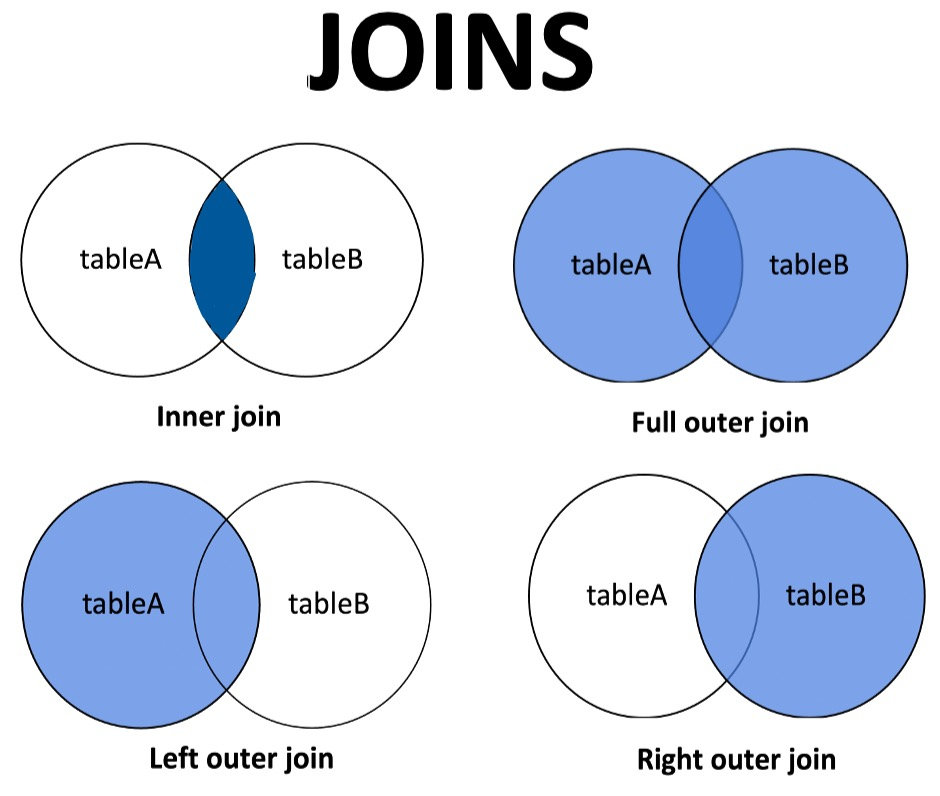

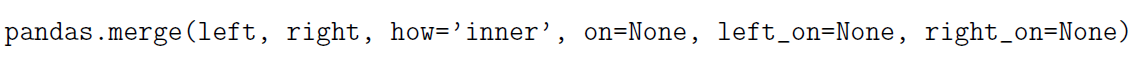

In [43]:
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C'],
    'value': [1, 2, 3]
})

df2 = pd.DataFrame({
    'key': ['A', 'B', 'D'],
    'value': [4, 5, 6]
})

print("DataFrame 1:")
display(df1)
print("\nDataFrame 2:")
display(df2)


DataFrame 1:


,key,value
0,A,1
1,B,2
2,C,3



DataFrame 2:


,key,value
0,A,4
1,B,5
2,D,6


In [44]:

# Realizar merge
result_merge = pd.merge(df1, df2, on='key', how='inner')
print("\nResultado de merge (inner):")
display(result_merge)


Resultado de merge (inner):


,key,value_x,value_y
0,A,1,4
1,B,2,5


In [45]:
result_merge_o = pd.merge(df1, df2, on='key', how='outer')
print("\nResultado de merge (outer):")
display(result_merge_o)


Resultado de merge (outer):


,key,value_x,value_y
0,A,1.0,4.0
1,B,2.0,5.0
2,C,3.0,NaN
3,D,NaN,6.0


In [46]:
result_merge_l = pd.merge(df1, df2, on='key', how='left')
print("\nResultado de merge (left):")
display(result_merge_l)


Resultado de merge (left):


,key,value_x,value_y
0,A,1,4.0
1,B,2,5.0
2,C,3,NaN


In [47]:
result_merge_r = pd.merge(df1, df2, on='key', how='right')
print("\nResultado de merge (right):")
display(result_merge_r)


Resultado de merge (right):


,key,value_x,value_y
0,A,1.0,4
1,B,2.0,5
2,D,NaN,6


## 2. Función `join()`
### Ejemplo básico: Unión por índices

In [49]:
df3 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2'])

df4 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
}, index=['K0', 'K1', 'K3'])

print("\nDataFrame 1:")
display(df3)
print("\nDataFrame 2:")
display(df4)




DataFrame 1:


,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2



DataFrame 2:


,C,D
K0,C0,D0
K1,C1,D1
K3,C2,D2


In [52]:
# Realizar join
result_join_l = df3.join(df4, how='left',sort='False')
print("\nResultado de join (outer):")
display(result_join_l)


Resultado de join (outer):


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,NaN,NaN


In [53]:
result_join_r = df3.join(df4, how='right')
print("\nResultado de join (right):")
display(result_join_r)


Resultado de join (right):


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K3,NaN,NaN,C2,D2


In [55]:
result_join_r = df3.join(df4, how='outer')
print("\nResultado de join (right):")
display(result_join_r)


Resultado de join (right):


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,NaN,NaN
K3,NaN,NaN,C2,D2


## 3. Función `concat()`
### Ejemplo básico: Concatenación por filas

In [57]:
df5 = pd.DataFrame({
    'A': ['A0', 'A1'],
    'B': ['B0', 'B1'],
    'C': ['C0', 'C1']
})

df6 = pd.DataFrame({
    'A': ['A2', 'A3'],
    'B': ['B2', 'B3']
})

df7 = pd.DataFrame({
    'A': ['A4', 'A5','A6'],
    'B': ['B4', 'B5','B6']
})

print("\nDataFrame 5:")
display(df5)
print("\nDataFrame 6:")
display(df6)

print("\nDataFrame 7:")
display(df7)




DataFrame 5:


,A,B,C
0,A0,B0,C0
1,A1,B1,C1



DataFrame 6:


,A,B
0,A2,B2
1,A3,B3



DataFrame 7:


,A,B
0,A4,B4
1,A5,B5
2,A6,B6


In [66]:
# Concatenar por filas
result_concat = pd.concat([df5, df6], axis=0,ignore_index=True)
print("\nResultado de concat (por filas):")
display(result_concat)


Resultado de concat (por filas):


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,NaN
3,A3,B3,NaN


In [67]:
display(df5)
display(df7)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1


,A,B
0,A4,B4
1,A5,B5
2,A6,B6


### Inner

In [75]:
# Concatenar por columnas
result_concat_c = pd.concat([df5, df7], axis=0,ignore_index=False,join="inner")
print("\nResultado de concat (por columnas):")
display(result_concat_c)


Resultado de concat (por columnas):


,A,B
0,A0,B0
1,A1,B1
0,A4,B4
1,A5,B5
2,A6,B6


### Outer

In [81]:
display(df5)
display(df6)
display(df7)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1


,A,B
0,A2,B2
1,A3,B3


,A,B
0,A4,B4
1,A5,B5
2,A6,B6


In [85]:
# Concatenar por columnas
result_concat_c = pd.concat([df5,df6, df7], axis=1,ignore_index=True,join="outer")
print("\nResultado de concat (por columnas):")
display(result_concat_c)


Resultado de concat (por columnas):


,0,1,2,3,4,5,6
0,A0,B0,C0,A2,B2,A4,B4
1,A1,B1,C1,A3,B3,A5,B5
2,NaN,NaN,NaN,NaN,NaN,A6,B6
